In [3]:
import numpy as np

In [27]:
def minres(A,b,x0,eps = 1e-15, maxiter = 1000):
    r_0 = A@x0 - b # создание начального r_n
    t_1 = r_0@(A@r_0)/(np.linalg.norm(A@r_0))**2 # создание начального тау
    x1 = x0 - t_1*r_0 # создание первого приближения
    x_0 = x0
    xn1 = x0 - t_1*r_0
    xn = x0
    n = 0
    
    while np.linalg.norm(xn1 - xn) > eps and n < maxiter:
        xn = xn1 # не знаю, что тут комментировать, так как я написал просто то, что написано в онлайн-курсе
        rn = A@xn - b
        tau_n1 = rn@(A@rn)/(np.linalg.norm(A@rn))**2
        xn1 = xn - tau_n1*rn
        n += 1
    return xn1

Просмотрим случай, когда диагональные элементы большие по сравнению со всеми остальными

In [28]:
error = [] # создадим наши матрицы, и решения к ним вместе с ошибкой
for i in range(2,100): # способ создания произвольной матрицы, взятый из первой части дз. 
    # этот способо будет использоваться везде
    rndm = np.random.RandomState(1234)
    A = rndm.uniform(size=(i, i)) + np.diagflat([15]*i)
    b = rndm.uniform(size=i)
    x0 = np.ones(len(b))
    minres(A,b,x0)
    error.append(np.linalg.norm(minres(A,b,x0) - np.linalg.solve(A,b)))


In [4]:
import matplotlib.pyplot as plt

In [94]:
n1 = [i for i in range(2,100)]

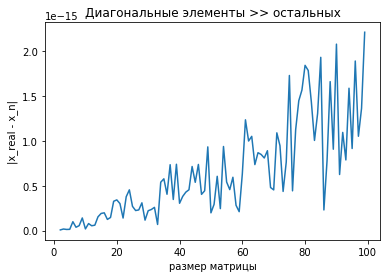

In [96]:
plt.figure()
plt.plot(n1, error)
plt.ylabel('|x_real - x_n|')
plt.xlabel('размер матрицы')
plt.title('Диагональные элементы >> остальных')
plt.show()

Как видим из масштаба графика, в такой ситуации наш способ всегда будет приближать вне зависимости от размера матриц.

Проведем еще один такой тест

Проанализируем сейчас случай, когда у матрицы все элементы одного порядка.

In [106]:
error5 = [] # создадим наши матрицы, и решения к ним вместе с ошибкой
for i in range(2,100):
    rndm5 = np.random.RandomState(1234)
    A5 = rndm5.uniform(size=(i, i)) + np.diagflat([25]*i)
    b5 = rndm5.uniform(size=i)
    x05 = np.ones(len(b5))
    minres(A5,b5,x05)
    error5.append(np.linalg.norm(minres(A5,b5,x05) - np.linalg.solve(A5,b5)))


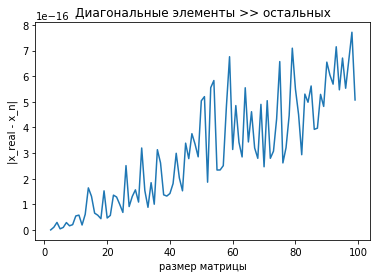

In [107]:
plt.figure()
plt.plot(n1, error5)
plt.ylabel('|x_real - x_n|')
plt.xlabel('размер матрицы')
plt.title('Диагональные элементы >> остальных')
plt.show()

Видим, что ничего не поменялось. А значит наше предположение о работе метода является верным.

Посмотрим, что будет происходит теперь в случае, когда все элементы одного порядка

In [130]:
error1 = []
for i in range(2,100):
    rndm = np.random.RandomState(1234)
    A1 = rndm.uniform(size=(i, i))
    b1 = rndm.uniform(size=i)
    x0 = np.ones(len(b1))
    minres(A1,b1,x0)
    error1.append(np.linalg.norm(minres(A1,b1,x0) - np.linalg.solve(A1,b1)))

min: 0.7318183256797102
index_min: 7


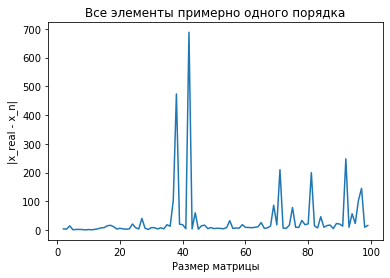

In [131]:
n = [i for i in range(2,100)]
plt.figure()
plt.plot(n, error1)
plt.xlabel('Размер матрицы')
plt.ylabel('|x_real - x_n|')
plt.title('Все элементы примерно одного порядка')
print('min:', min(error1))
print('index_min:', np.array(error1).argmin())

Из графика нельзя сделать вывод: сходиться ли где-то решения или нет. На каких-то участках может сходиться, так как из-за масштаба не видно. Для этого найдем минимальный элемент и рассмотрим, что творится там. 

min: 0.7318183256797102


Text(0.5, 1.0, 'Зависимость отличия найденного решения от реального от размера матрицы(участок, где отличие минимально)')

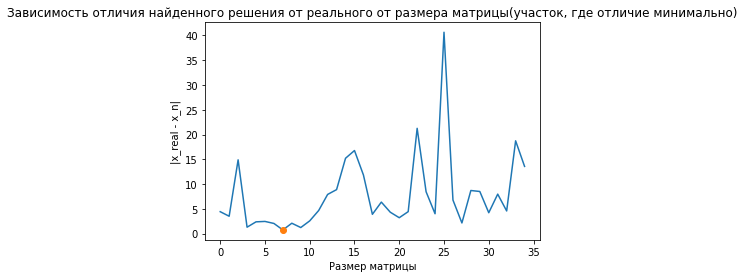

In [102]:
error11 = [error1[i] for i in range(35)]
plt.figure()
y = [i for i in range(35)]
plt.plot(y,error11)
plt.plot(np.array(error11).argmin(),error11[np.array(error11).argmin()], 'o')
print('min:',min(error11))
plt.ylabel('|x_real - x_n|')
plt.xlabel('Размер матрицы')
plt.title('Зависимость отличия найденного решения от реального от размера матрицы(участок, где отличие минимально)')

Видно, что на этом участке минимальная разница $|x_{real} - x_n| \approx 0.7$. Видно, что точность не хорошая $\Longrightarrow$ использование такого метода для любой матрицы, у которой все элементы матрицы примерно одного порядка, не работает.

Сделаем также еще один тест.

In [124]:
error6 = []
for i in range(2,100):
    rndm6 = np.random.RandomState(1235)
    A6 = rndm6.uniform(size=(i, i))
    b6 = rndm6.uniform(size=i)
    x06 = np.ones(len(b6))
    minres(A6,b6,x06)
    error6.append(np.linalg.norm(minres(A6,b6,x06) - np.linalg.solve(A6,b6)))

min: 3.0201331455116262e-15
index_min: 2


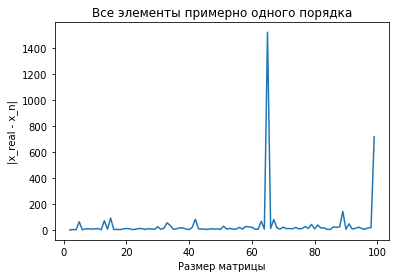

In [125]:
n = [i for i in range(2,100)]
plt.figure()
plt.plot(n, error6)
plt.xlabel('Размер матрицы')
plt.ylabel('|x_real - x_n|')
plt.title('Все элементы примерно одного порядка')
print('min:', min(error6))
print('index_min:', 2+np.array(error6).argmin())

Получили, что в этом случае алгоритм работает для матрицы 2х2

In [135]:
for i in range(len(error6)):
    if error6[i] <1:
        print(2+i,error6[i])

2 3.0201331455116262e-15
6 0.6024342435935917


Тогда еще сделаем один тест.

In [137]:
error6 = []
for i in range(2,100):
    rndm6 = np.random.RandomState(1236)
    A6 = rndm6.uniform(size=(i, i))
    b6 = rndm6.uniform(size=i)
    x06 = np.ones(len(b6))
    minres(A6,b6,x06)
    error6.append(np.linalg.norm(minres(A6,b6,x06) - np.linalg.solve(A6,b6)))

min: 0.009652256768494342
index_min: 2


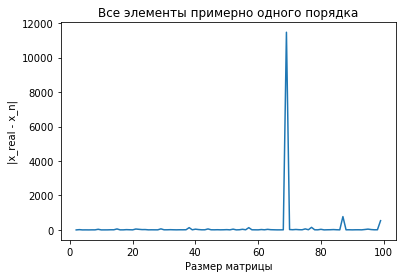

In [138]:
n = [i for i in range(2,100)]
plt.figure()
plt.plot(n, error6)
plt.xlabel('Размер матрицы')
plt.ylabel('|x_real - x_n|')
plt.title('Все элементы примерно одного порядка')
print('min:', min(error6))
print('index_min:', 2+np.array(error6).argmin())

Теперь получили, что максимальная точность снова около $10^{-3}$

Давайте еще один тест сделаем.

In [140]:
error6 = []
for i in range(2,100):
    rndm6 = np.random.RandomState(1237)
    A6 = rndm6.uniform(size=(i, i))
    b6 = rndm6.uniform(size=i)
    x06 = np.ones(len(b6))
    minres(A6,b6,x06)
    error6.append(np.linalg.norm(minres(A6,b6,x06) - np.linalg.solve(A6,b6)))

min: 1.2679371876554299e-05
index_min: 2


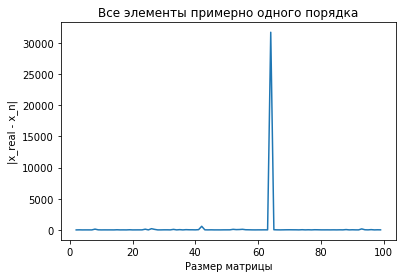

In [141]:
n = [i for i in range(2,100)]
plt.figure()
plt.plot(n, error6)
plt.xlabel('Размер матрицы')
plt.ylabel('|x_real - x_n|')
plt.title('Все элементы примерно одного порядка')
print('min:', min(error6))
print('index_min:', 2+np.array(error6).argmin())

Снова получили намного лучше точность. 

Мне кажется, что такие качели происходят из-за функции $np.random.RandomState()$. Потому что когда последнее число в аргументе четное - точность никакая, а когда нечетная - точность очень хорошая. Но это работает только для матриц 2х2. А для других размеров уже точность будет плохой. так как норма будет больше 1. Думаю, что отсюда все равно можно сделать вывод, что метод для случая, когда элементы одного порядка между собой, не годится, так как он кое-как работает с какой-то странной спецификой для матриц только 2х2

Теперь посмотрим, что происходит, когда диагональные маленькие по сравнению с остальными.

In [69]:
rndm1 = np.random.RandomState(1234)
error2 = []
import random
for i in range(2,100):
    rndm1 = np.random.RandomState(1234)
    A2 = rndm1.uniform(size=(i, i))
    for j in range(i):
        A2[j][j] = np.random.randint(0,10,1)*0.001
    b2 = rndm1.uniform(size=i)
    x02 = np.ones(len(b2))
    minres(A2,b2,x02)
    error2.append(np.linalg.norm(minres(A2,b2,x02) - np.linalg.solve(A2,b2)))

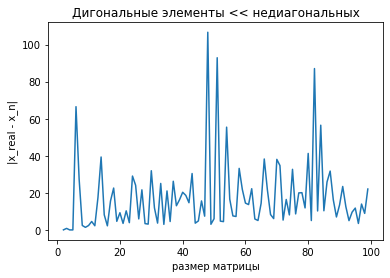

min: 0.0026541747772249264
index_min: 4


In [77]:
n3 = [i for i in range(2,100)]
plt.figure()
plt.plot(n3, error2)
plt.ylabel('|x_real - x_n|')
plt.xlabel('размер матрицы')
plt.title('Дигональные элементы << недиагональных')
plt.show()
print('min:', min(error2))
print('index_min:', 2+np.array(error2).argmin())


Видим, что самая маленькая разница в самом начале, потом она увеличивается $\Longrightarrow$ такие размеры матриц нам не подходят. Лучше даже в этом убедиться, что нам ТЕОРЕТИЧЕСКИ подходят только маленькие матрицы путем отсевки тех размеров, при которых норма больше 1, так как такая точность точно уж нам не нужна.

In [81]:
for i in range(len(error2)):
    if error2[i] < 1:
        print(i)

0
1
2
3


Убедились в том, что нам ВЕРОЯТНО подойдут только матрицы с маленьким размером. Посмотрим теперь на график.

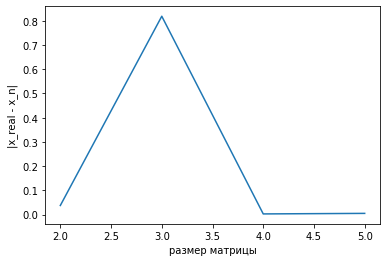

In [88]:
y = [error2[i] for i in range(0,4)]
x = [i+2 for i in range(0,4)]
plt.figure()
plt.plot(x, y)
plt.ylabel('|x_real - x_n|')
plt.xlabel('размер матрицы')
plt.show()

Видим, что точность более менее какая-то есть для матриц размером 4х4 и 5х5 порядка $10^{-3}$. А для 2х2 там порядок $10^{-2}$


Посмотрим на другие матрицы с такими элементами, может быть, нам просто повезло.

In [143]:
rndm4 = np.random.RandomState(1235)
error4 = []
import random
for i in range(2,100):
    rndm4 = np.random.RandomState(1235)
    A4 = rndm4.uniform(size=(i, i))
    for j in range(i):
        A4[j][j] = np.random.randint(0,10,1)*0.001
    b4 = rndm4.uniform(size=i)
    x04 = np.ones(len(b4))
    minres(A4,b4,x04)
    error4.append(np.linalg.norm(minres(A4,b4,x04) - np.linalg.solve(A4,b4)))

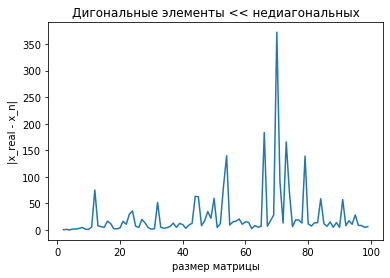

min: 0.060186649500629845
index_min: 4


In [144]:
n4 = [i for i in range(2,100)]
plt.figure()
plt.plot(n4, error4)
plt.ylabel('|x_real - x_n|')
plt.xlabel('размер матрицы')
plt.title('Дигональные элементы << недиагональных')
plt.show()
print('min:', min(error4))
print('index_min:', 2+np.array(error4).argmin())

Тут также минимальная разница будет для матрицы 4х4, но точность хуже. Значит, вариант, когда диагональные элементы маленькие по сравнению с остальными нам тоже не подходит, потому что такая точность нас не будет устраивать.

Так как мы поняли, что метод работает только для случая, когда диагональные элементы больше остальных, то логично будет произвести анализ $\tau (n)$ только для этоо случая.

Возьмем несколько матриц и посмотрим на их примере. Сейчас будем по одному алгоритму строить график $\tau(n)$. То есть будем строить, как будет меняться $\tau$ в зависимости от итерационного шага.

In [8]:
def minres1(A,b,x0,eps = 1e-15, maxiter = 1000):
    r_0 = A@x0 - b
    t_1 = r_0@(A@r_0)/(np.linalg.norm(A@r_0))**2
    x1 = x0 - t_1*r_0
    x_0 = x0
    xn1 = x0 - t_1*r_0
    xn = x0
    n = 0
    tau = []
    while np.linalg.norm(xn1 - xn) > eps and n < maxiter:
        xn = xn1
        rn = A@xn - b
        tau_n1 = rn@(A@rn)/(np.linalg.norm(A@rn))**2
        xn1 = xn - tau_n1*rn
        tau.append(tau_n1)
        n += 1
    return tau

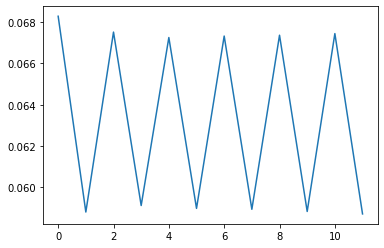

In [21]:
rndm11 = np.random.RandomState(1234)
A11 = rndm11.uniform(size=(4, 4)) + np.diagflat([15]*4)
b11 = rndm11.uniform(size=4)
x0 = np.ones(len(b11))
x = [i for i in range(len(minres1(A11,b11,x0)))]
plt.figure()
plt.plot(x,minres1(A11,b11,x0))

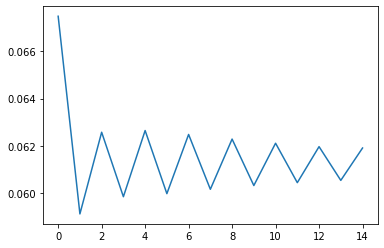

In [22]:
rndm11 = np.random.RandomState(1234)
A11 = rndm11.uniform(size=(6, 6)) + np.diagflat([15]*6)
b11 = rndm11.uniform(size=6)
x0 = np.ones(len(b11))
x = [i for i in range(len(minres1(A11,b11,x0)))]
plt.figure()
plt.plot(x,minres1(A11,b11,x0))

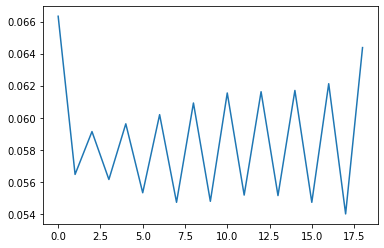

In [23]:
rndm11 = np.random.RandomState(1234)
A11 = rndm11.uniform(size=(10, 10)) + np.diagflat([15]*10)
b11 = rndm11.uniform(size=10)
x0 = np.ones(len(b11))
x = [i for i in range(len(minres1(A11,b11,x0)))]
plt.figure()
plt.plot(x,minres1(A11,b11,x0))

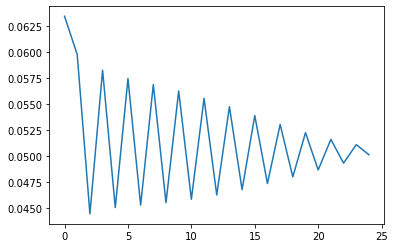

In [24]:
rndm11 = np.random.RandomState(1234)
A11 = rndm11.uniform(size=(20, 20)) + np.diagflat([15]*20)
b11 = rndm11.uniform(size=20)
x0 = np.ones(len(b11))
x = [i for i in range(len(minres1(A11,b11,x0)))]
plt.figure()
plt.plot(x,minres1(A11,b11,x0))

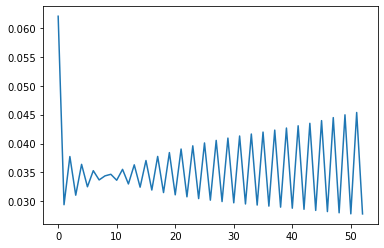

In [25]:
rndm11 = np.random.RandomState(1234)
A11 = rndm11.uniform(size=(60, 60)) + np.diagflat([15]*60)
b11 = rndm11.uniform(size=60)
x0 = np.ones(len(b11))
x = [i for i in range(len(minres1(A11,b11,x0)))]
plt.figure()
plt.plot(x,minres1(A11,b11,x0))

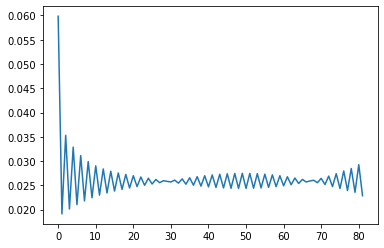

In [26]:
rndm11 = np.random.RandomState(1234)
A11 = rndm11.uniform(size=(100, 100)) + np.diagflat([15]*100)
b11 = rndm11.uniform(size=100)
x0 = np.ones(len(b11))
x = [i for i in range(len(minres1(A11,b11,x0)))]
plt.figure()
plt.plot(x,minres1(A11,b11,x0))

Посмотрев на матрицы различных размеров можно сделать вывод только о переодичных скачках значений $\tau$ и что ее значения ограничены. Какой-то явной зависимости тут нельзя определить, на мой взгляд. 